In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
        image (numpy array): Original image.
        factor (int): Factor by which to downsample.
    Returns:
        numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(
        image,
        (width // factor, height // factor),
        interpolation=cv2.INTER_NEAREST
    )
    return sampled_image


def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.
    Args:
        image (numpy array): Original image.
        levels (int): Number of grayscale levels.
    Returns:
        numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image


def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by side.
    Args:
        original (numpy array): Original image.
        sampled (numpy array): Sampled image.
        quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()


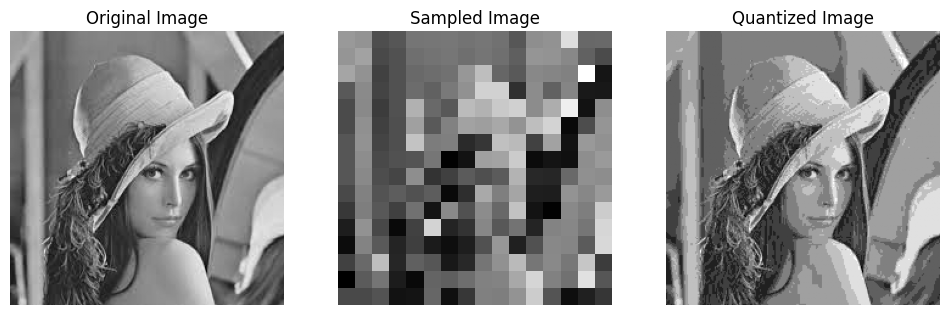

UnidentifiedImageError: cannot identify image file 'images/A.png'

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sample_image(image, factor):
    height, width = image.shape[:2]
    sampled_image = cv2.resize(
        image,
        (width // factor, height // factor),
        interpolation=cv2.INTER_NEAREST
    )
    return sampled_image

def quantize_image(image, levels):
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

def plot_images(original, sampled, quantized):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')
    plt.show()

image_path = 'images/lena_gray_256.tif'
sampling_factor = 14
quantization_levels = 9

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    sampled_image = sample_image(original_image, sampling_factor)
    quantized_image = quantize_image(original_image, quantization_levels)
    plot_images(original_image, sampled_image, quantized_image)

img1 = Image.open('images/lena_gray_256.tif')
img2 = Image.open('images/cameraman.tif')
resize = (400, 400)
img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)
im1arr = np.asarray(img1, dtype=np.uint8)
im2arr = np.asarray(img2, dtype=np.uint8)
addition = np.clip(im1arr + im2arr, 0, 255).astype(np.uint8)
result_add = Image.fromarray(addition)
result_add.show()
subtraction = np.clip(im1arr - im2arr, 0, 255).astype(np.uint8)
result_sub = Image.fromarray(subtraction)
result_sub.show()
add_constant = np.clip(im1arr + 175, 0, 255).astype(np.uint8)
result_const = Image.fromarray(add_constant)
result_const.show()

img3 = Image.open('images/A.png')
img4 = Image.open('images/B.png')
img3 = img3.resize(resize, Image.Resampling.LANCZOS)
img4 = img4.resize(resize, Image.Resampling.LANCZOS)
im3arr = np.asarray(img3, dtype=np.uint8)
im4arr = np.asarray(img4, dtype=np.uint8)
union = im3arr | im4arr
result_union = Image.fromarray(union)
result_union.show()
intersection = im3arr & im4arr
result_intersection = Image.fromarray(intersection)
result_intersection.show()
difference = im3arr & (~im4arr)
result_difference = Image.fromarray(difference)
result_difference.show()
sym_diff = im3arr ^ im4arr
result_symdiff = Image.fromarray(sym_diff)
result_symdiff.show()
